# Tweeter Data Analysis Using Python

## Install Dependencies


In [249]:
!pip install tweepy
!pip install wordcloud

## Import Libraries

In [1]:
import csv
import pandas as pd

import tweepy
from nltk import sent_tokenize, word_tokenize
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Download NLTK resources

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

## Initiate Variables

In [3]:
bearer_token = '<paste_your_token>'
account_name = 'neilpatel'
tweet_fields = ['id','text','created_at','lang','public_metrics']
exclude_fields = ['retweets', 'replies']
number_of_tweets = 500

tweets_file_path = 'patel_tweets.csv'

## Downloading Tweets


In [4]:
client = tweepy.Client(bearer_token=bearer_token)
my_user=client.get_user(username=account_name)

In [5]:
tweets_generator = tweepy.Paginator(client.get_users_tweets, 
                                    my_user.data.id,
                                    tweet_fields=tweet_fields,
                                    exclude=exclude_fields,
                                    max_results=100, limit=number_of_tweets/100
                                   ).flatten(number_of_tweets)

## Writing tweets to a csv file

In [6]:
with open(tweets_file_path,'w', newline='',encoding="utf8") as fw:
    my_writer=csv.writer(fw, quotechar='"', quoting=csv.QUOTE_MINIMAL)
    my_writer.writerow(tweet_fields)

    for tweet in tweets_generator:
        tweet_values = [tweet.id, tweet.text.encode('unicode_escape').decode(), 
                        tweet.created_at, tweet.lang, tweet.public_metrics]
        my_writer.writerow(tweet_values)

# Wordclouds

In [7]:
tweets_df = pd.read_csv(tweets_file_path).replace(r'\\n|\\u|http[^\s]*',' ', regex=True)

In [8]:
frequencies_dict = {
    'verb': {},
    'noun': {},
    'adjective': {}
}

In [9]:
for text in tweets_df["text"]:
    lower_text = text.lower()
    words = word_tokenize(lower_text)
    tagged_words=nltk.pos_tag(words) 
         
    for word, pos in tagged_words:
        if pos.startswith("VB"):
            frequencies_dict['verb'][word] = frequencies_dict['verb'].get(word, 0) + 1
            
        if pos.startswith("NN"):
            frequencies_dict['noun'][word] = frequencies_dict['noun'].get(word, 0) + 1
            
        if pos.startswith("JJ"):
            frequencies_dict['adjective'][word] = frequencies_dict['adjective'].get(word, 0) + 1

### Wordcloud with verbs

In [10]:
def plot_wordcloud(frequencies: dict) -> None:
    """
    Plots a wordcloud based on input frequences.
    
    Args:
        frequencies (dict): Holding word frequency    
    """
    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=frequencies)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

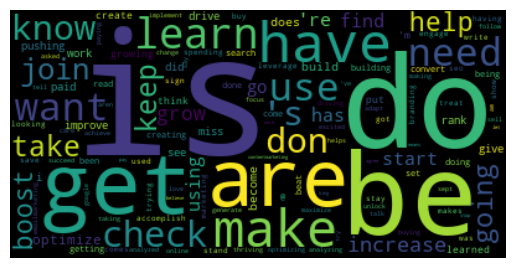

In [11]:
plot_wordcloud(frequencies=frequencies_dict['verb'])

### Wordcloud with nouns

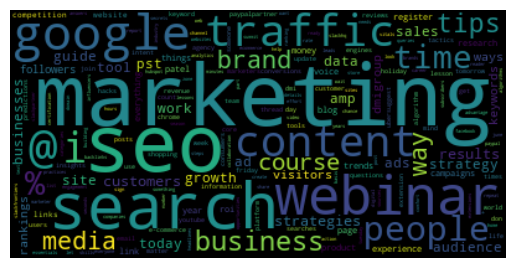

In [12]:
plot_wordcloud(frequencies=frequencies_dict['noun'])

### Wordcloud with adjectives

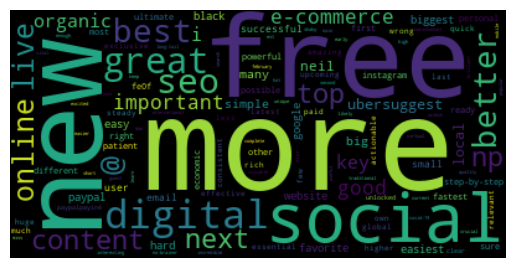

In [13]:
plot_wordcloud(frequencies=frequencies_dict['adjective'])